<a href="https://colab.research.google.com/github/justaplan/stack_overflow_survey_analysis/blob/master/stack_overflow_survey_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive" , force_remount=True)

%cd "/content/gdrive/My Drive/Python/List of CSV"

In [102]:
df_schema = pd.read_csv("survey_results_schema.csv", index_col="Column")
df = pd.read_csv("survey_results_public.csv")

In [105]:
df_schema.index

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

**<h1>Chart Plotting</h1>**

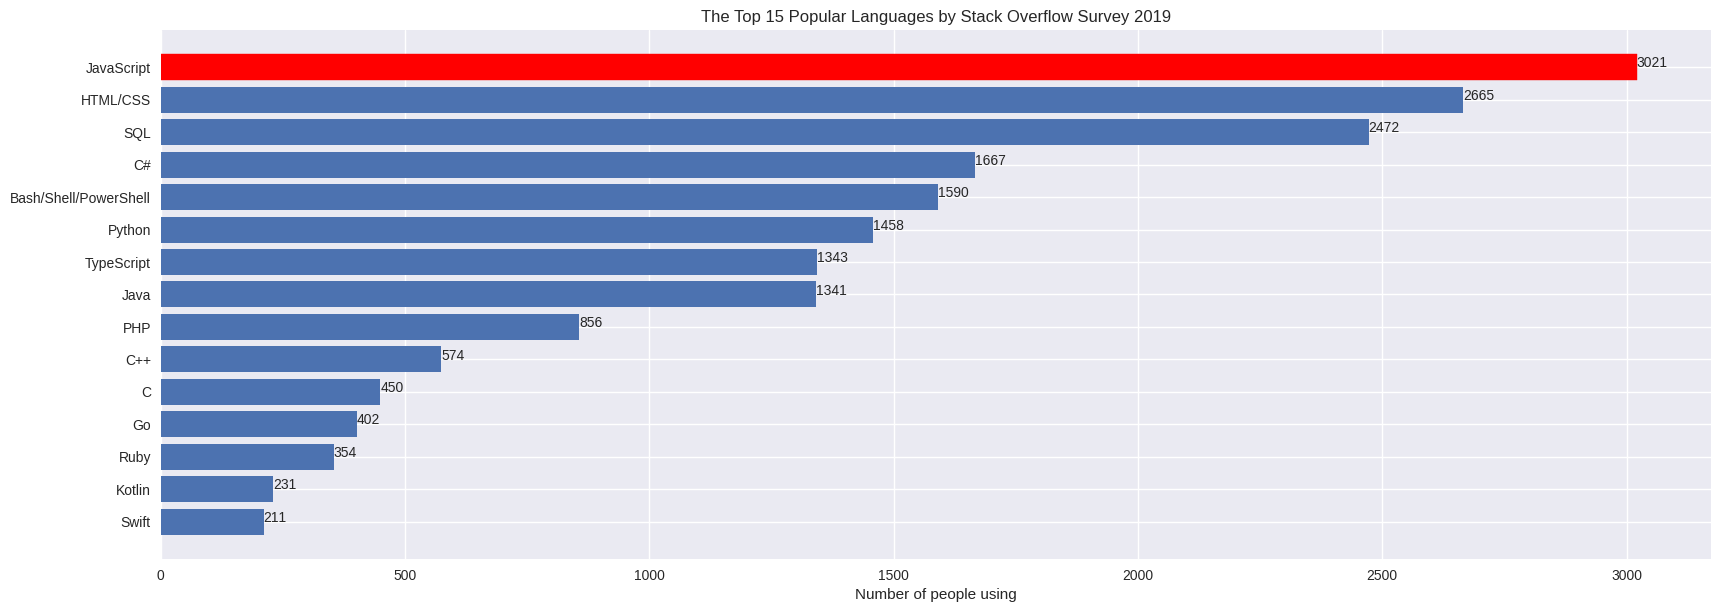

In [36]:
df = df.dropna()

id = df["Respondent"]
lang_responses = df["LanguageWorkedWith"]

language_counter = Counter()

for response in lang_responses:
  language_counter.update(response.split(";"))

languages = []
popularity = []

for item in language_counter.most_common(15):
  languages.append(item[0])
  popularity.append(item[1])

x_indexes = np.arange(len(languages))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
barlist = plt.barh(x_indexes,popularity[::-1])
barlist[-1].set_color("red")

## Text Labelling in Chart
reverse_x = x_indexes[::-1]
for x,y in zip (popularity,reverse_x):
  plt.text(x,y,s=x)

## Chart Title and Labelling
plt.title("The Top 15 Popular Languages by Stack Overflow Survey 2019")
plt.xlabel("Number of people using")
plt.yticks(reverse_x,languages)


plt.show()

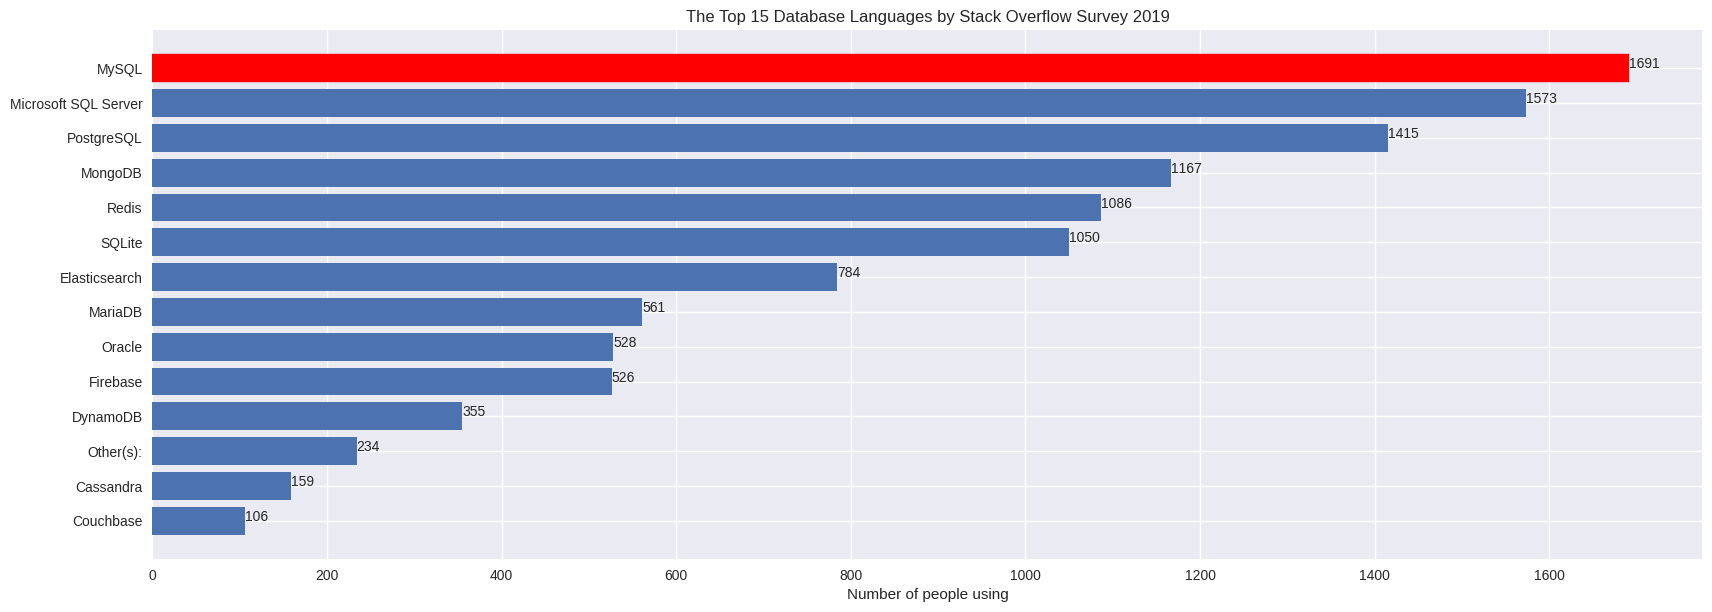

In [100]:
df = df.dropna()

id = df["Respondent"]
database_responses = df["DatabaseWorkedWith"]

database_counter = Counter()

for response in database_responses:
  database_counter.update(response.split(";"))

database = []
popularity = []

for item in database_counter.most_common(15):
  database.append(item[0])
  popularity.append(item[1])

x_indexes = np.arange(len(database))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
barlist = plt.barh(x_indexes,popularity[::-1])
barlist[-1].set_color("r")

## Text Labelling in Chart
reverse_x = x_indexes[::-1]
for x,y in zip (popularity,reverse_x):
  plt.text(x,y,s=x)

## Chart Title and Labelling
plt.title("The Top 15 Database Languages by Stack Overflow Survey 2019")
plt.yticks(reverse_x,database)
plt.xlabel("Number of people using")

plt.show()

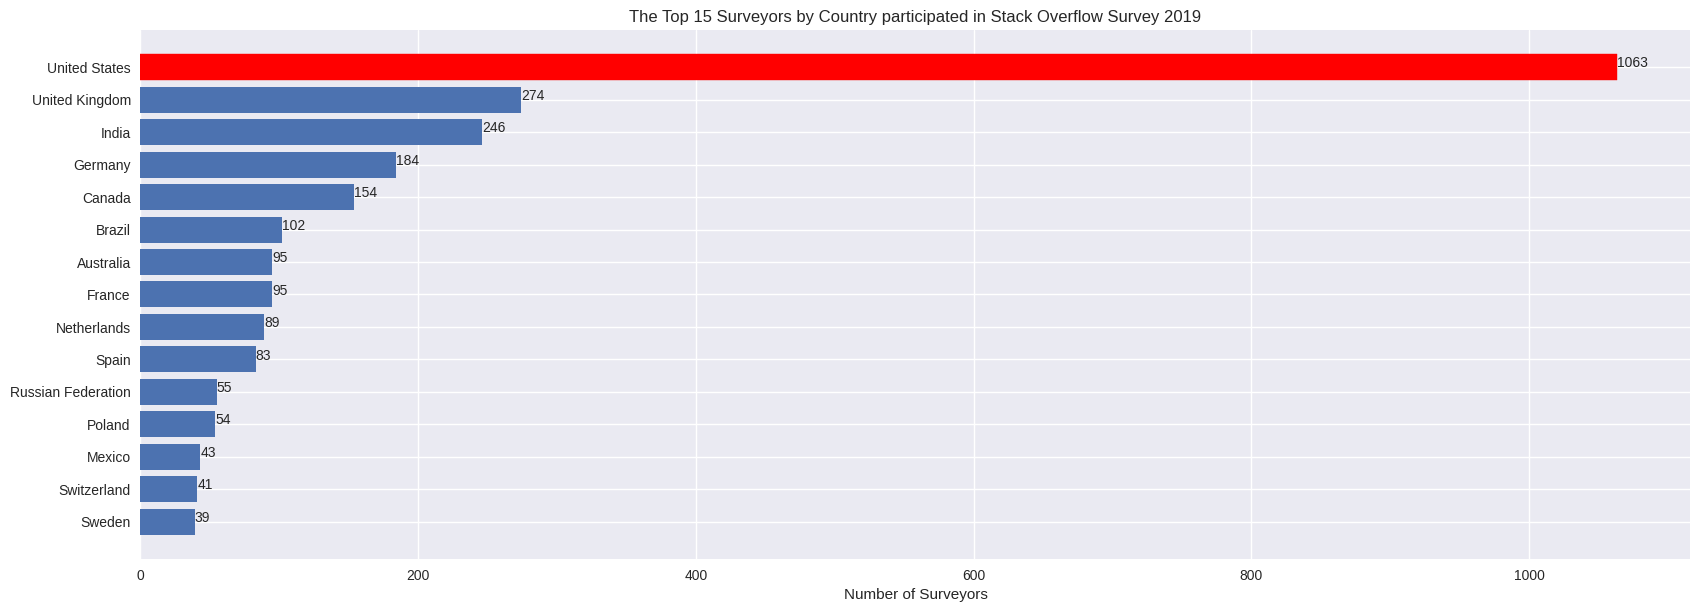

In [101]:
x = df["Country"].value_counts().nlargest(15).index.tolist()
y = df["Country"].value_counts().nlargest(15)

x_indexes = np.arange(len(x))

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
barlist = plt.barh(x_indexes,y[::-1])
barlist[-1].set_color("r")

plt.yticks(x_indexes[::-1],x)

## Text Labelling in Chart
reverse_x = x_indexes[::-1]
for x,y in zip(y,reverse_x):
  plt.text(x,y, s=x)


## Chart Title and Labelling
plt.title("The Top 15 Surveyors by Country participated in Stack Overflow Survey 2019")
plt.xlabel("Number of Surveyors")

plt.show()

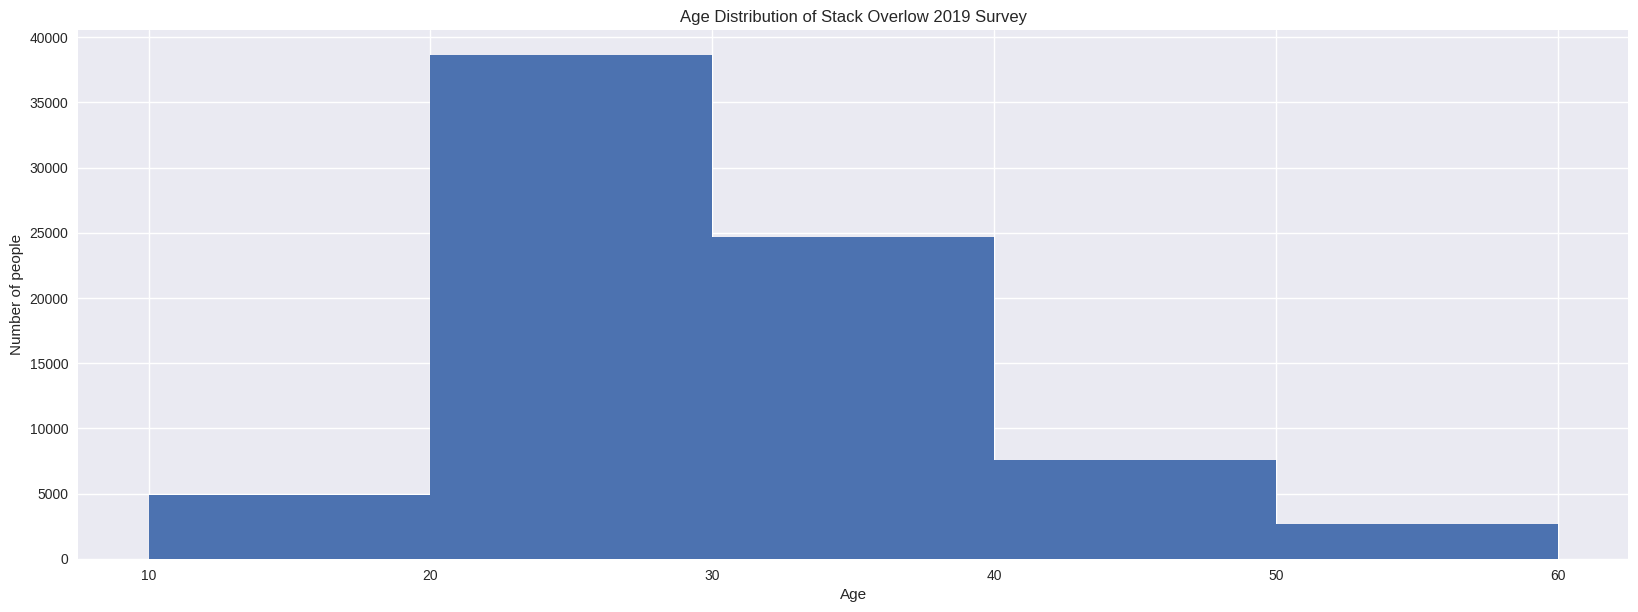

In [143]:
## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

x = df["Age"]
bins = [10,20,30,40,50,60]
age_hist = plt.hist(x,bins=bins)

## Chart Title and Label
plt.title("Age Distribution of Stack Overlow 2019 Survey")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.xticks(bins)

plt.show()